In [1]:
import numpy as np
import mkl_fft
from functools import partial
import copy

# add path to scatnet_python module
from path import PATH_TO_MODULE
import sys
sys.path.append(PATH_TO_MODULE)

from scatnet_python import *

import matplotlib.pylab as plt
%matplotlib inline

# Signal transform with wavelet filter bank

--------------------- 
 Random noise signal 
 --------------------- 

Signal filtered by  Psi filters and downsampled 

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  51.] <class 'numpy.ndarray'>


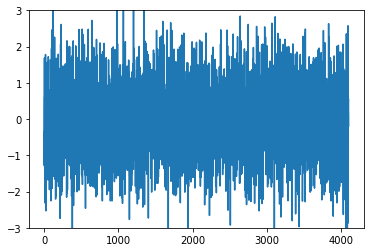

/home/julia/anaconda3/envs/tf15/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


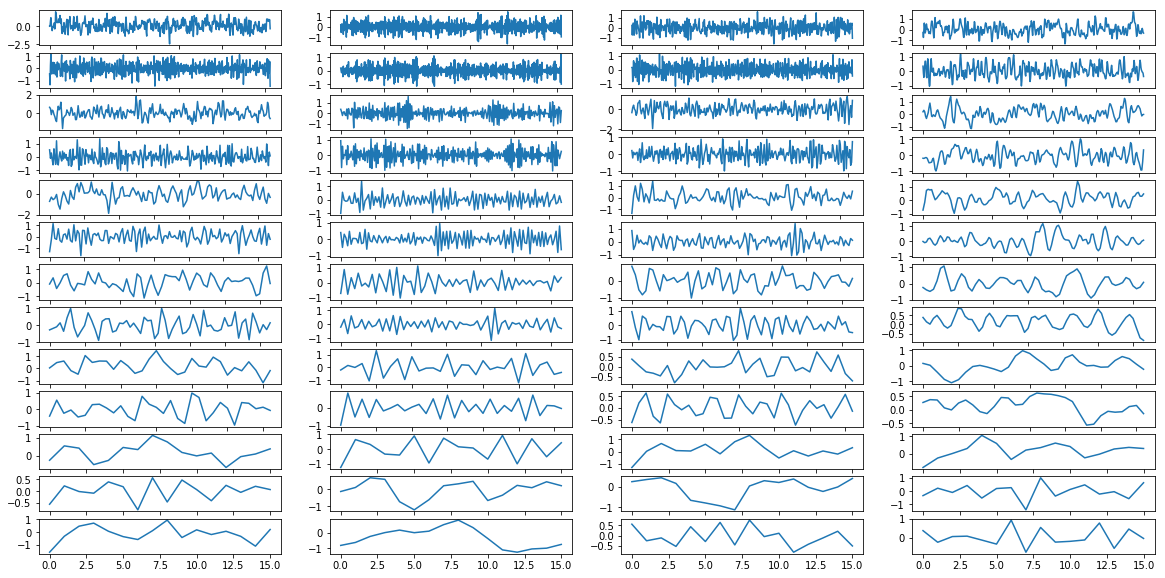

Signal filtered by Phi filter and downsampled 

-1 <class 'numpy.ndarray'>


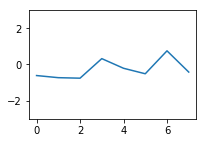

--------------------- 
 Sine signal 
 --------------------- 

Signal filtered by  Psi filters and downsampled 

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  51.] <class 'numpy.ndarray'>


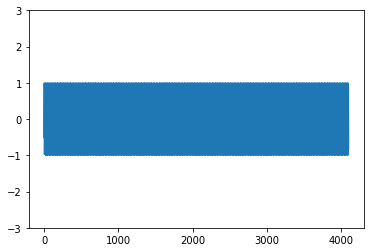

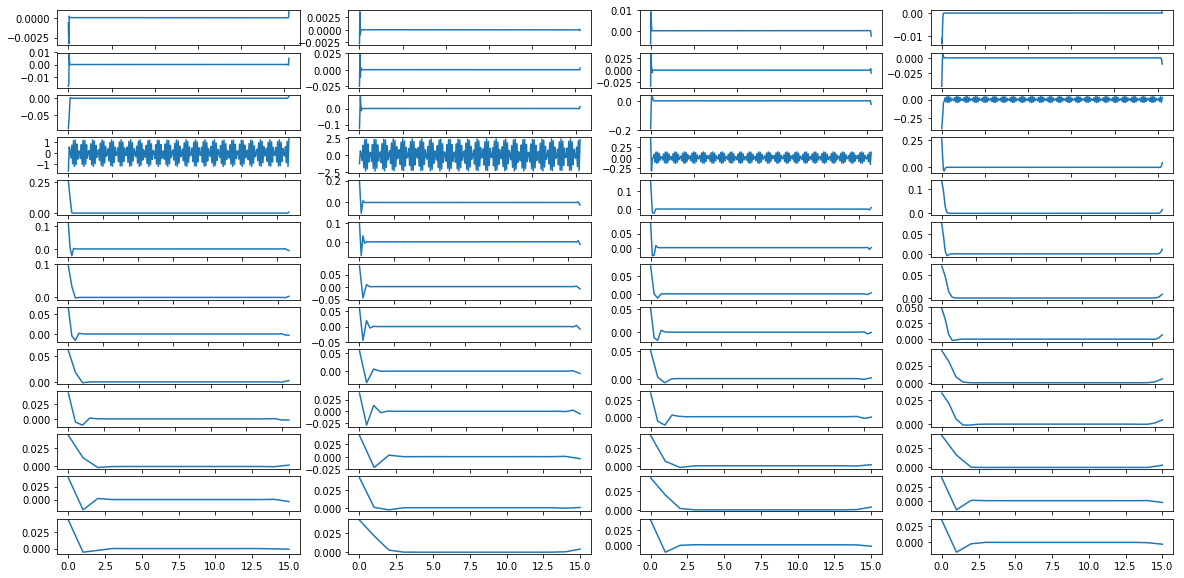

Signal filtered by Phi filter and downsampled 

-1 <class 'numpy.ndarray'>


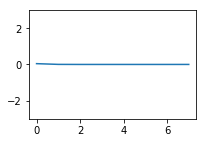

In [2]:
# WAVELET_1D performs one-dimensional wavelet transform
# (for all wavelets in one filter bank)
test_wavelet_1d(T=2**10, N = 2**12, plot = True)

# Wavelet layer

In [3]:
# WAVELET_LAYER_1D computes the one-dimensional wavelet transform from
# the modulus wavelet coefficients of the previous layer.

# This function has a pivotal role between WAVELET_1D (which computes a
# single wavelet transform), and WAVELET_FACTORY_1D (which creates the
# whole cascade)

# Let's test two layers (second layer takes the output of the first one)
U_phi, U_psi, U_phi2, U_psi2 = test_wavelet_layer_1d(T = 2**10, N = 2**12)


 Layer 1
Phi filters output:
 j:[], number of signals: 1
Psi filters output:
 j:[[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
   14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
   28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
   42.  43.  44.  45.  46.  47.  48.  49.  50.  51.]], number of signals:52

 Layer 2
Phi filters output:
 j:[[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
   14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
   28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
   42.  43.  44.  45.  46.  47.  48.  49.  50.  51.]], number of signals:52
Psi filters output:
 j:[[  0.   0.   0.   0.   0.   0.   1.   1.   1.   1.   1.   1.   2.   2.
    2.   2.   2.   2.   3.   3.   3.   3.   3.   3.   4.   4.   4.   4.
    4.   4.   5.   5.   5.   5.   5.   5.   6.   6.   6.   6.   6.   6.
    7.   7.   7.   7.   7.   8.   8.   8.   8.   8.   9.   9.  

In [4]:
# WAVELET_FACTORY_1D creates wavelet layer transforms needed for the  
# scattering transform
test_wavelet_factory_1d(T = 2**10, N = 2**12)


 Filter bank 0
Signals filtered with Phi filters: {}
[(8, 1, 4)]
Signals filtered with Psi filters: {}
[(512, 1, 4), (512, 1, 4), (512, 1, 4), (512, 1, 4), (512, 1, 4), (512, 1, 4), (512, 1, 4), (512, 1, 4), (256, 1, 4), (256, 1, 4), (256, 1, 4), (256, 1, 4), (256, 1, 4), (256, 1, 4), (256, 1, 4), (256, 1, 4), (128, 1, 4), (128, 1, 4), (128, 1, 4), (128, 1, 4), (128, 1, 4), (128, 1, 4), (128, 1, 4), (128, 1, 4), (64, 1, 4), (64, 1, 4), (64, 1, 4), (64, 1, 4), (64, 1, 4), (64, 1, 4), (64, 1, 4), (64, 1, 4), (32, 1, 4), (32, 1, 4), (32, 1, 4), (32, 1, 4), (32, 1, 4), (32, 1, 4), (32, 1, 4), (32, 1, 4), (16, 1, 4), (16, 1, 4), (16, 1, 4), (16, 1, 4), (16, 1, 4), (16, 1, 4), (16, 1, 4), (16, 1, 4), (16, 1, 4), (16, 1, 4), (16, 1, 4), (16, 1, 4)]

 Filter bank 1
Signals filtered with Phi filters: {}
[(8, 1, 4)]
Signals filtered with Psi filters: {}
[(4096, 1, 4), (2048, 1, 4), (1024, 1, 4), (512, 1, 4), (256, 1, 4), (128, 1, 4), (64, 1, 4), (32, 1, 4), (16, 1, 4), (8, 1, 4)]

 Filter bank 

# Test scattering network

In [5]:
S = test_scat()

{'precision': 'float64', 'phi_bw_miltiplier': 1, 'Q': 8, 'J': 41, 'boundary': 'symm', 'B': 8, 'center_psi0': 3.0112229095168628, 'filter_type': 'morlet_1d', 'T': 1024, 'sigma_phi0': 6.9563662072526471, 'sigma_psi0': 6.9563662072526471, 'sigma0': 1.1547005383792517, 'P': 11, 'phi_dirac': 0}
{'precision': 'float64', 'phi_bw_miltiplier': 2, 'Q': 1, 'J': 10, 'boundary': 'symm', 'B': 1, 'center_psi0': 2.356194490192345, 'filter_type': 'morlet_1d', 'T': 1024, 'sigma_phi0': 0.57735026918962584, 'sigma_psi0': 1.1547005383792517, 'sigma0': 1.1547005383792517, 'P': 0, 'phi_dirac': 0}


In [6]:
for i in range(len(S)):
    print(vars(S[i].meta))

{'j': array([], shape=(0, 1), dtype=float64), 'bandwidth': [0.0081481090045581496], 'resolution': [9.0]}
{'j': array([[  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.]]), 'bandwidth': [0.0061359231515425647, 0.0061359231515425647, 0.0061359231515425647, 0.0061359231515425647, 0.0061359231515425647, 0.0061359231515425647, 0.0061359231515425647, 0.0061359231515425647, 0.0061359231515425647, 0.0061359231515425647, 0.0061359231515425647, 0.0061359231515425647, 0.0061359231515425647, 0.0061359231515425647, 0.0061359231515425647, 0.0061359231515425647, 0.0061359231515425647, 0.0061359231515425647, 0.0061359231515425647, 0.0061359231515425647, 0.0061359231515425647, 0.0061359231515425647, 0.006135923151